In [1]:
# importing the module
import cv2

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

In [158]:
# driver function
if __name__=="__main__":

	# reading the image
	img = cv2.imread('Image_2.png', 1)

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()

1452   468


In [15]:
574-408

166

In [59]:
690+400

1090

In [61]:
y=690
h=400
x=810
w=1049-810


In [62]:
import cv2
img = cv2.imread("Image_2.png")
he, we, ce = img.shape
print('width:  ', we)
print('height: ', he)
print('channel:', ce)
#crop_img = img[y:y+h, x:x+w]
crop_img = img[y:y+h, x:x+w]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

width:   1920
height:  1080
channel: 3


In [ ]:
https://www.pyimagesearch.com/2021/01/19/crop-image-with-opencv/

(200, 480)


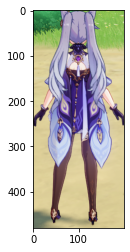

In [120]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

width=200
y_shift=-80
height=400
im = Image.open("Image_2.png")
left = int(im.size[0]/2-width/2)
right = left +width

upper = int(im.size[1]/2-height/2)  - y_shift
lower = upper + height - y_shift
im_cropped = im.crop((left, upper,right,lower))
print(im_cropped.size)
plt.imshow(np.asarray(im_cropped))


In [192]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
def drop_center(image):
    width=200
    y_shift=-80
    height=400
    left = int(im.size[0]/2-width/2)
    right = left +width
    upper = int(im.size[1]/2-height/2)  - y_shift
    lower = upper + height - y_shift
    im_cropped = im.crop((left, upper,right,lower))
    return im_cropped
    


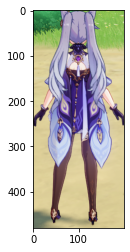

In [193]:
image = Image.open("Image_2.png")
plt.imshow(np.asarray(drop_center(image)))

In [152]:
import numpy as np
from PIL import Image


def convert_from_cv2_to_image(img: np.ndarray) -> Image:
    # return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return Image.fromarray(img)


def convert_from_image_to_cv2(img: Image) -> np.ndarray:
     #return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    return cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)       
   # return np.asarray(img)

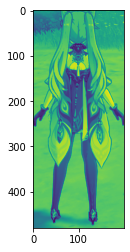

In [153]:
plt.imshow(convert_from_image_to_cv2(im_cropped))

In [197]:
#https://stackoverflow.com/questions/68089067/opencv-python-remove-certain-objects-in-an-image
import cv2
import numpy as np
import time
start = time.time()
threshold = 0.4
image = cv2.imread('Image_2.png')
imageG = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#template = cv2.imread('template-2.png', 0)
#w, h = template.shape[::-1]
template= convert_from_image_to_cv2(im_cropped)
w, h = im_cropped.size
res = cv2.matchTemplate(imageG,template,cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)
mask = np.zeros_like(imageG)
for pt in zip(*loc[::-1]):
    #a = cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
    cv2.rectangle(mask, (pt[0]+3, pt[1]+3), (pt[0]+w-3, pt[1]+h-3), 255, -1)  # Reduce the size of the rectangle by 3 pixels from each side

image = cv2.inpaint(image, mask, 2, cv2.INPAINT_NS)

cv2.imshow('lag.jpg', image)
cv2.imshow('mask', mask)
end = time.time()
final = end - start
print(final)
cv2.waitKey(0)
cv2.destroyAllWindows()

0.22745132446289062


In [200]:

import cv2
import numpy as np
import time
start = time.time()
threshold = 0.4
image = cv2.imread('Image_2.png')
imageG = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template= convert_from_image_to_cv2(im_cropped)

mask = np.zeros_like(imageG)
# remove the contours from the image and show the resulting images
image = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Mask", mask)
cv2.imshow("After", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [181]:
import cv2
import numpy as np
import time
def dropping_center(image):
    threshold = 0.4
    imageG = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im_cropped=drop_center(image)
    template= convert_from_image_to_cv2(im_cropped)
    w, h = im_cropped.size
    res = cv2.matchTemplate(imageG,template,cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= threshold)
    mask = np.zeros_like(imageG)
    for pt in zip(*loc[::-1]):
        #a = cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
        cv2.rectangle(mask, (pt[0]+3, pt[1]+3), (pt[0]+w-3, pt[1]+h-3), 255, -1)  # Reduce the size of the rectangle by 3 pixels from each side
    image = cv2.inpaint(image, mask, 2, cv2.INPAINT_NS)
    #cv2.imshow('lag.jpg', image)
    #cv2.imshow('mask', mask)
    return image

In [195]:
image = cv2.imread('Image_2.png')
dropped_img=dropping_center(image)

In [196]:
cv2.imshow('lag.jpg', dropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [159]:
import cv2
import numpy as np
import win32gui, win32ui, win32con, win32api

def grab_screen(region=None):

    hwin = win32gui.GetDesktopWindow()

    if region:
            left,top,x2,y2 = region
            width = x2 - left + 1
            height = y2 - top + 1
    else:
        width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
        height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
        left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
        top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)

    hwindc = win32gui.GetWindowDC(hwin)
    srcdc = win32ui.CreateDCFromHandle(hwindc)
    memdc = srcdc.CreateCompatibleDC()
    bmp = win32ui.CreateBitmap()
    bmp.CreateCompatibleBitmap(srcdc, width, height)
    memdc.SelectObject(bmp)
    memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)
    
    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height,width,4)

    srcdc.DeleteDC()
    memdc.DeleteDC()
    win32gui.ReleaseDC(hwin, hwindc)
    win32gui.DeleteObject(bmp.GetHandle())

    return cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

In [201]:
import numpy as np
from PIL import ImageGrab
import cv2
import time
def process_img(image):
    original_image = image
    # removing center
    image=dropping_center(image)
    
    # convert to gray
    processed_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # edge detection
    #processed_img =  cv2.Canny(processed_img, threshold1 = 200, threshold2=300)
    return processed_img

def main():
    for i in list(range(4))[::-1]:
        print(i+1)
        time.sleep(1)
        last_time = time.time()
        while True:
            # 800x600 windowed mode
            #screen =  np.array(ImageGrab.grab(bbox=(0,40,800,640)))
            # 1920 windowed mode
            screen = grab_screen(region=(0,40,1920,1120))
            #print('Frame took {} seconds'.format(time.time()-last_time))
            last_time = time.time()
            new_screen = process_img(screen)
            cv2.imshow('window', new_screen)
            #cv2.imshow('window',cv2.cvtColor(screen, cv2.COLOR_BGR2RGB))
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

In [202]:
main()

4


C:\Anaconda3\envs\pygta5\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


3
2
1
